# Exploratory Data Analysis on Spotify 2023 Dataset


### Spotify Dataset Overview

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
spotify = pd.read_csv('spotify-2023.csv')
spotify


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


### General Informations

In [6]:
# Display dataset dimensions and basic info
print(f"Dataset Dimensions:\nRows: {spotify.shape[0]}, Columns: {spotify.shape[1]}")
spotify.info()

# Missing values overview
missing_values = spotify.isnull().sum()
missing_values = missing_values[missing_values > 0].reset_index()
missing_values.columns = ['Column', 'Missing Values']
missing_values

Dataset Dimensions:
Rows: 953, Columns: 24
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 1

,Column,Missing Values
0,in_shazam_charts,50
1,key,95


In [8]:
print(f"Rows: {spotify.shape[0]} \nColumns: {spotify.shape[1]}")

Rows: 953 
Columns: 24


#### Statistics

In [7]:
spotify.describe()


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### Mean, Median, and Standard Deviation

In [13]:
# Convert 'streams' column to numeric
spotify['streams'] = pd.to_numeric(spotify['streams'].astype(str).str.replace(',', ''), errors='coerce')

# Calculate and display statistics
mean_streams = spotify['streams'].mean()
median_streams = spotify['streams'].median()
std_streams = spotify['streams'].std()

# Display stream statistics in a table
stream_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Standard Deviation'],
    'Value': [mean_streams, median_streams, std_streams]
})
stream_stats.style.format({"Value": "{:.2f}"})


,Statistic,Value
0,Mean,514137424.94
1,Median,290530915.00
2,Standard Deviation,566856949.04


### Released Year and Artist Count Distribution Statistics

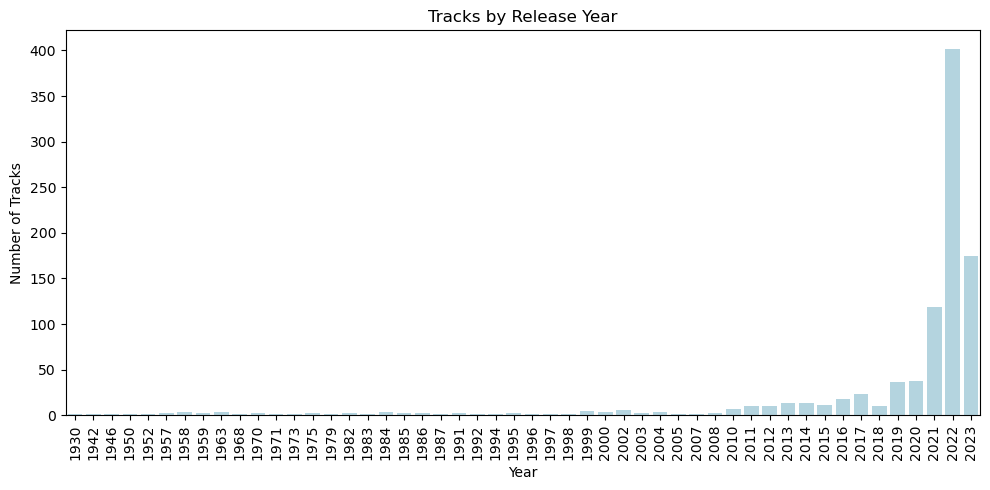

In [15]:
# Distribution of release years
year_counts = spotify['released_year'].value_counts().sort_index()

# Plot distribution with rotated x-axis labels for better readability
plt.figure(figsize=(10, 5))
sns.barplot(x=year_counts.index, y=year_counts.values, color='lightblue')
plt.title('Tracks by Release Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.tight_layout()
plt.show()


##### The data reveals a significant spike in the number of track releases in 2022, indicating that this year saw the highest volume of notable music releases. Additionally, we observe an upward trend in popular music starting from 2014, marking the beginning of a rise in popular tracks and musical trends.

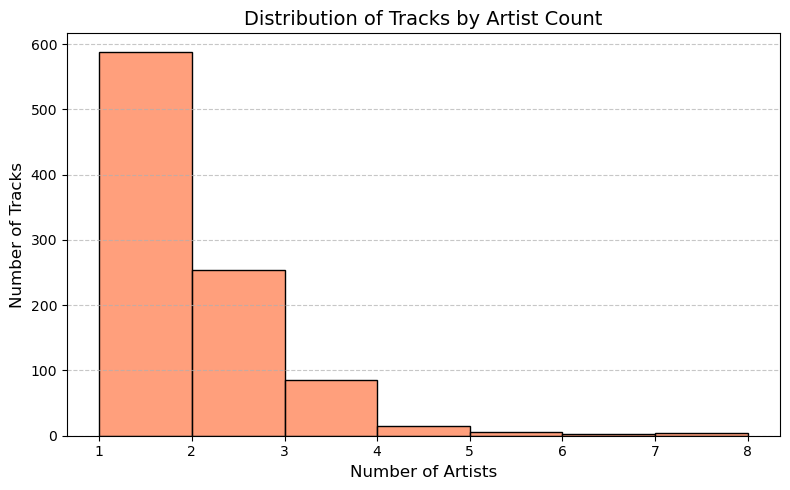

In [18]:
# Set Seaborn style and create a simplified artist count distribution plot
plt.figure(figsize=(8, 5))
sns.histplot(spotify['artist_count'], binwidth=1, color="coral", edgecolor="black")
plt.title("Distribution of Tracks by Artist Count", fontsize=14)
plt.xlabel("Number of Artists", fontsize=12)
plt.ylabel("Number of Tracks", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### The data shows that the majority of released tracks are solo productions. However, there is also a substantial number of tracks that feature collaborations with other artists.

#### Top 5 Most Streamed Tracks(2023)

In [23]:
spotify['streams'] = pd.to_numeric(spotify['streams'].astype(str).str.replace(',', ''), errors='coerce')
top_5_streams_df = spotify.sort_values(by='streams', ascending=False).head(5).reset_index(drop=True)
top_5_streams_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
3,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


#### Top 5 Most Frequent Artist

In [11]:
top_artists = spotify['artist(s)_name'].str.split(', ').explode().value_counts().nlargest(5).reset_index()
top_artists.columns = ['Artist', 'Track Count']
top_artists



,Artist,Track Count
0,Bad Bunny,40
1,Taylor Swift,38
2,The Weeknd,37
3,SZA,23
4,Kendrick Lamar,23


### Temporal Trends

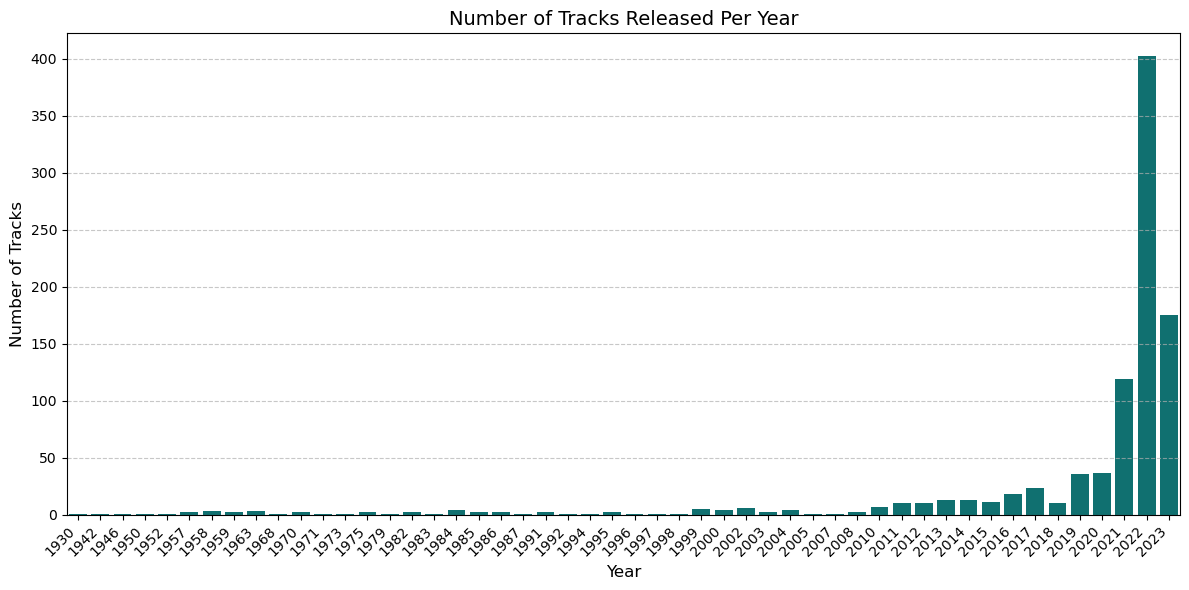

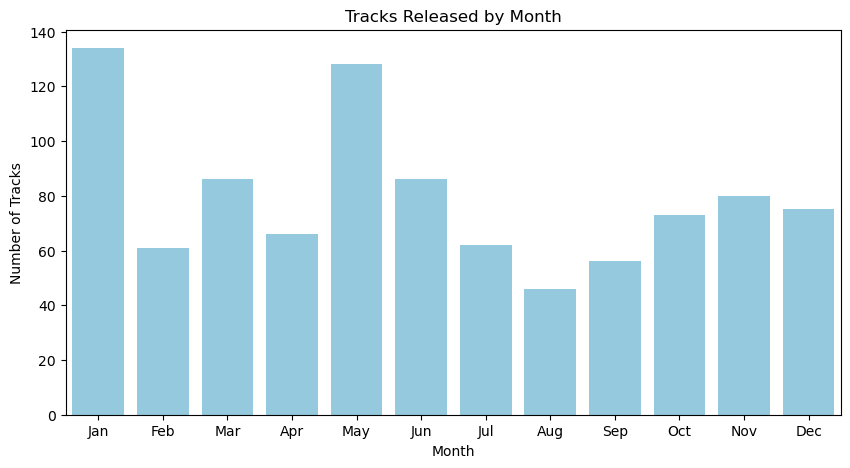

In [41]:
# Trend: Number of tracks released per year
# Tracks released per year with vertical bar chart and rotated x-axis labels
plt.figure(figsize=(12, 6))
sns.barplot(x=tracks_per_year.index, y=tracks_per_year.values, color='teal')
plt.title('Number of Tracks Released Per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Trend: Tracks released by month
spotify['released_month'] = pd.to_numeric(spotify['released_month'], errors='coerce')
tracks_per_month = spotify['released_month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=range(1, 13), y=tracks_per_month, color='skyblue')
plt.title('Tracks Released by Month')
plt.xlabel('Month')
plt.ylabel('Number of Tracks')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


##### Based on the yearly graph, A notable trend in popular music emerged in 2022, marking a significant rise in the number of popular tracks released during that year.. While on the montlhy graph. The data indicates a significant surge in popular music releases during the months of January and May, suggesting that these months experience a peak in track popularity.

### Genre and Music Characteristics

#### Stream and Attributes Correlation

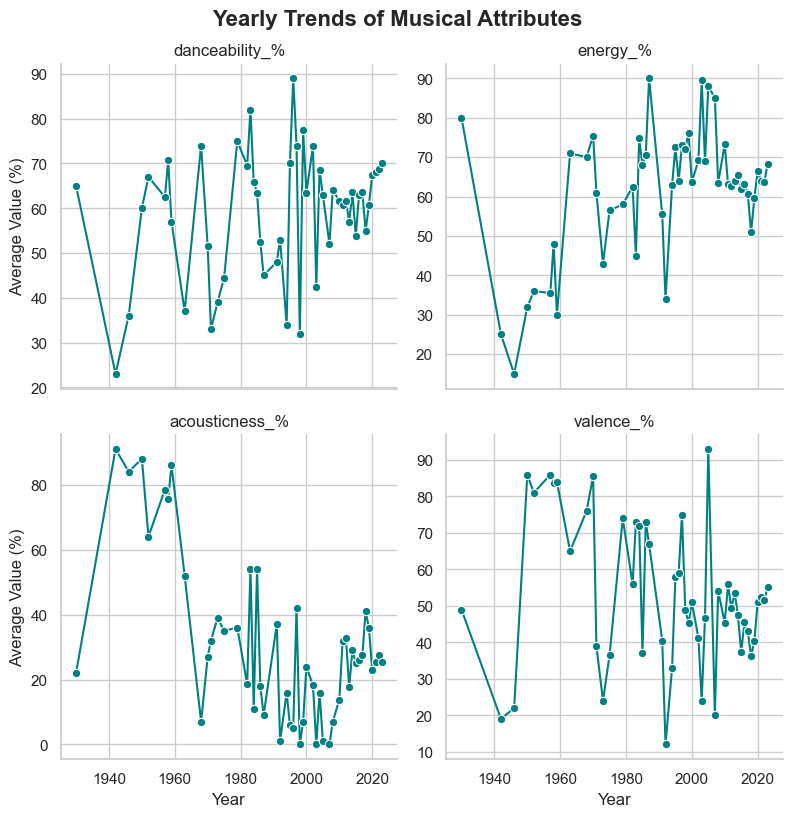

In [44]:
# Average musical attributes by release year
attributes_by_year = spotify.groupby('released_year')[['danceability_%', 'energy_%', 'acousticness_%', 'valence_%']].mean()

# FacetGrid for individual attribute trends over time
sns.set(style="whitegrid")
attributes_by_year_melted = attributes_by_year.reset_index().melt(id_vars='released_year', var_name='Attribute', value_name='Average Value')

g = sns.FacetGrid(attributes_by_year_melted, col="Attribute", col_wrap=2, height=4, sharey=False)
g.map(sns.lineplot, 'released_year', 'Average Value', color='teal', marker='o')

g.set_axis_labels("Year", "Average Value (%)")
g.set_titles("{col_name}")
g.add_legend()
plt.suptitle("Yearly Trends of Musical Attributes", y=1.02, fontsize=16, fontweight='bold')
plt.show()


##### In the FacetGrid analysis, most attributes show a negative correlation with streams, suggesting that these characteristics do not strongly influence track popularity. This could be due to the varying preferences among different listeners.

#### Analyzing the correlation of streams and musical attributes using scatterplot


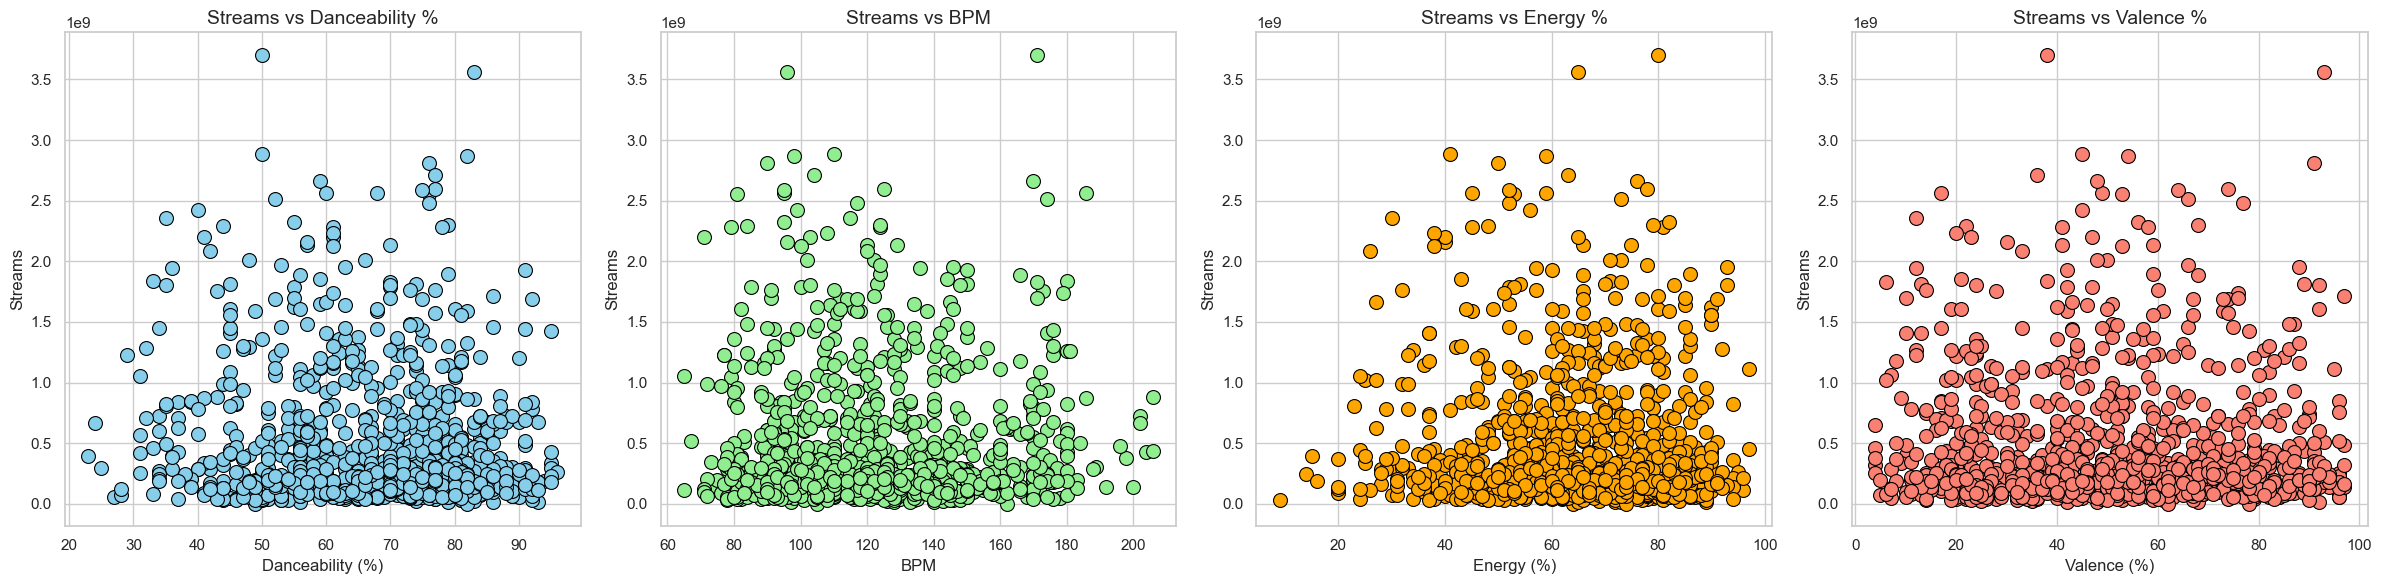

In [60]:
# Set up the figure for subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# Scatter plot for Streams vs Danceability
sns.scatterplot(ax=axes[0], x='danceability_%', y='streams', data=spotify, s=100, color='skyblue', edgecolor='black')
axes[0].set_title("Streams vs Danceability %", fontsize=14)
axes[0].set_xlabel("Danceability (%)", fontsize=12)
axes[0].set_ylabel("Streams", fontsize=12)

# Scatter plot for Streams vs BPM
sns.scatterplot(ax=axes[1], x='bpm', y='streams', data=spotify, s=100, color='lightgreen', edgecolor='black')
axes[1].set_title("Streams vs BPM", fontsize=14)
axes[1].set_xlabel("BPM", fontsize=12)
axes[1].set_ylabel("Streams", fontsize=12)

# Scatter plot for Streams vs Energy
sns.scatterplot(ax=axes[2], x='energy_%', y='streams', data=spotify, s=100, color='orange', edgecolor='black')
axes[2].set_title("Streams vs Energy %", fontsize=14)
axes[2].set_xlabel("Energy (%)", fontsize=12)
axes[2].set_ylabel("Streams", fontsize=12)

# Scatter plot for Streams vs Valence
sns.scatterplot(ax=axes[3], x='valence_%', y='streams', data=spotify, s=100, color='salmon', edgecolor='black')
axes[3].set_title("Streams vs Valence %", fontsize=14)
axes[3].set_xlabel("Valence (%)", fontsize=12)
axes[3].set_ylabel("Streams", fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

##### The scatterplot analysis revealed no significant correlation between the different music attributes and the number of streams. This finding led to the realization that the characteristics of a song may not necessarily determine its popularity.

#### Attributes Correlation

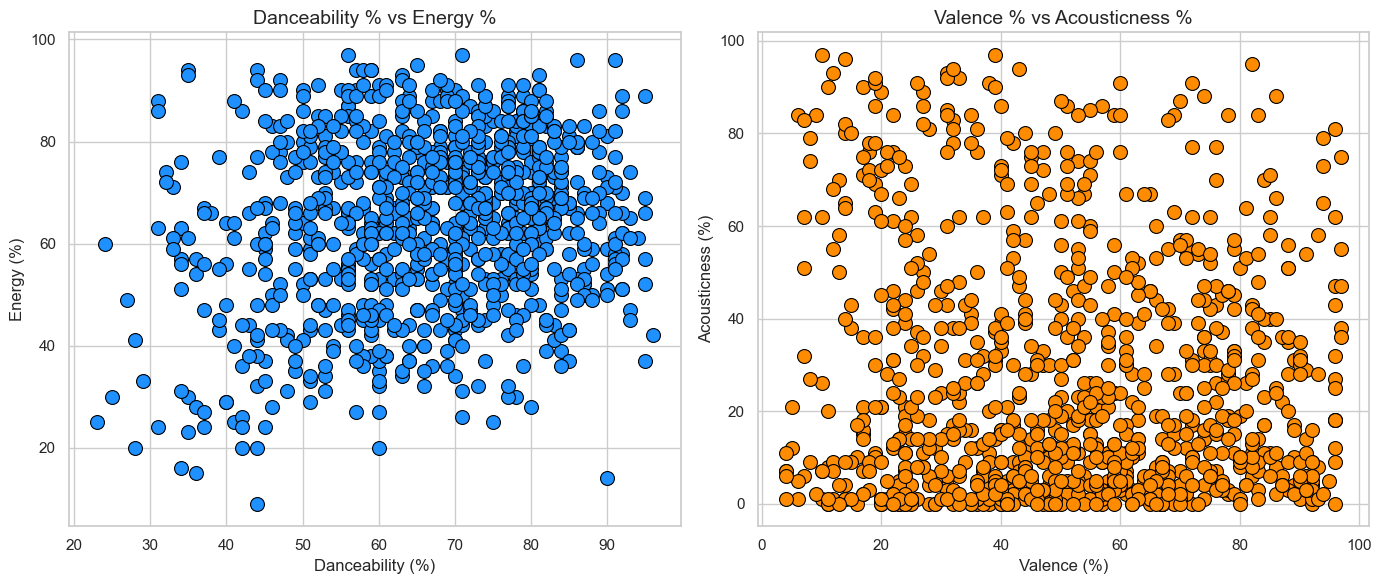

In [57]:
# Set up the figure for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot for Danceability vs Energy
sns.scatterplot(ax=axes[0], x='danceability_%', y='energy_%', data=spotify, s=100, color='dodgerblue', edgecolor='black')
axes[0].set_title("Danceability % vs Energy %", fontsize=14)
axes[0].set_xlabel("Danceability (%)", fontsize=12)
axes[0].set_ylabel("Energy (%)", fontsize=12)

# Scatter plot for Valence vs Acousticness
sns.scatterplot(ax=axes[1], x='valence_%', y='acousticness_%', data=spotify, s=100, color='darkorange', edgecolor='black')
axes[1].set_title("Valence % vs Acousticness %", fontsize=14)
axes[1].set_xlabel("Valence (%)", fontsize=12)
axes[1].set_ylabel("Acousticness (%)", fontsize=12)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

##### A strong correlation was observed between danceability and energy, indicating that as the danceability of a track increases, so does its energy level, and vice versa. On the other hand, valence and acousticness showed almost no correlation, suggesting that these two attributes are independent of each other.

### Platform Popularity, Patterns, and Consistency

#### Platform Comparison

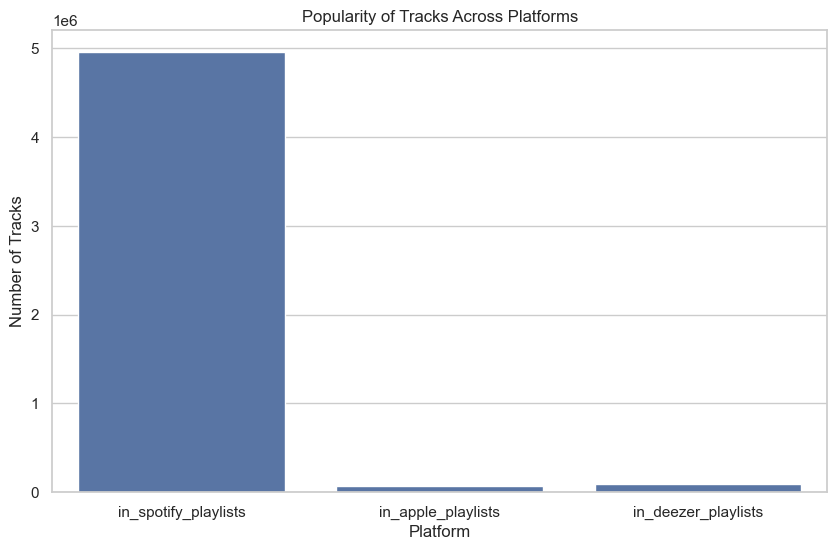

In [62]:
# Platform popularity
platform_cols = ['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']
spotify[platform_cols] = spotify[platform_cols].apply(pd.to_numeric, errors='coerce')
platform_data = spotify[platform_cols].sum().reset_index()
platform_data.columns = ['Platform', 'Count']
platform_data.style.set_caption("Popularity of Tracks Across Platforms")

# Plotting platform popularity
plt.figure(figsize=(10, 6))
sns.barplot(data=platform_data, x='Platform', y='Count')
plt.title('Popularity of Tracks Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Tracks')
plt.show()

##### The bar graph indicates that Spotify playlists feature the most popular songs among all platforms, highlighting Spotify's prominence in the music streaming space.

#### Keys Distribution

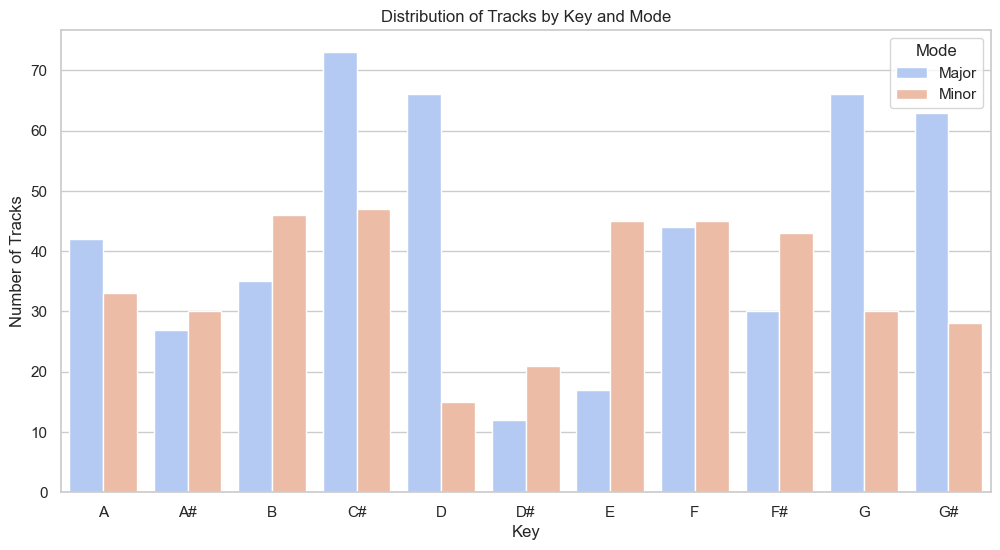

In [65]:
# Distribution by key and mode
key_mode_counts = spotify.groupby(['key', 'mode']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(data=key_mode_counts, x='key', y='Count', hue='mode', palette='coolwarm')
plt.title('Distribution of Tracks by Key and Mode')
plt.xlabel('Key')
plt.ylabel('Number of Tracks')
plt.legend(title='Mode')
plt.show()

##### The bar graph shows that C# has the highest number of tracks, whether in a minor or major key, while D# is the least used minor key and A is the least used major key.

#### Top 10 Most Frequent Artists on Charts

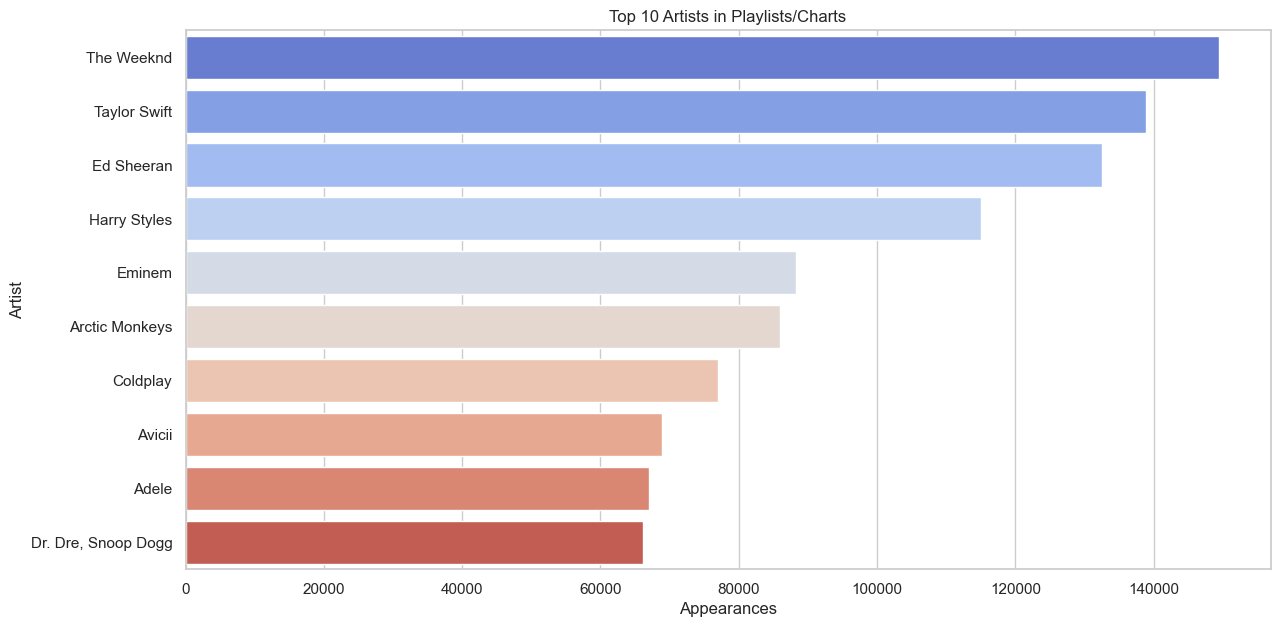

In [68]:
# Popular artists in playlists and charts
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']
artist_counts = spotify.groupby("artist(s)_name")[platform_columns].sum().sum(axis=1).sort_values(ascending=False)
top_10_artists = artist_counts.head(10).reset_index()
top_10_artists.columns = ['Artist', 'Appearances']

# Display top 10 most frequently appearing artists in playlists and charts
top_10_artists.style.set_caption("Top 10 Artists in Playlists/Charts")

# Plotting top artists
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_artists, x='Appearances', y='Artist', hue='Artist', palette='coolwarm')
plt.title('Top 10 Artists in Playlists/Charts')
plt.xlabel('Appearances')
plt.ylabel('Artist')
plt.show()


##### The top three artists most frequently appearing in playlists and charts are The Weeknd, Taylor Swift, and Ed Sheeran, known for their pop, romance, and R&B songs, respectively.
